# Deviation
Emphasise variations (+/-) from a fixed reference point. Typically the reference point is zero but it can also be a target or a long-term average. Can also be used to show sentiment (positive/neutral/negative).

In [9]:
import pandas as pd
#ggplot equivalent: plotnine
from plotnine import *
#scales package equivalent: mizani
from mizani.breaks import *
from mizani.formatters import *

## Diverging Bar
A simple standard bar chart that can handle both negative and positive magnitude values

In [10]:
df = pd.read_csv('data/diverging-bar.csv')
df['rnk'] = df['Profit Ratio'].argsort().map(lambda x: str(x).zfill(2)+'_')
df['new_sub'] = df['rnk'] + df['Sub-Category'] 
df.drop('rnk',1,inplace=True)
df.head()

,Sub-Category,Profit Ratio,new_sub
0,Furnishings,-26,00_Furnishings
1,Appliances,-11,01_Appliances
2,Tables,-9,02_Tables
3,Bookcases,-8,03_Bookcases
4,Supplies,-7,04_Supplies


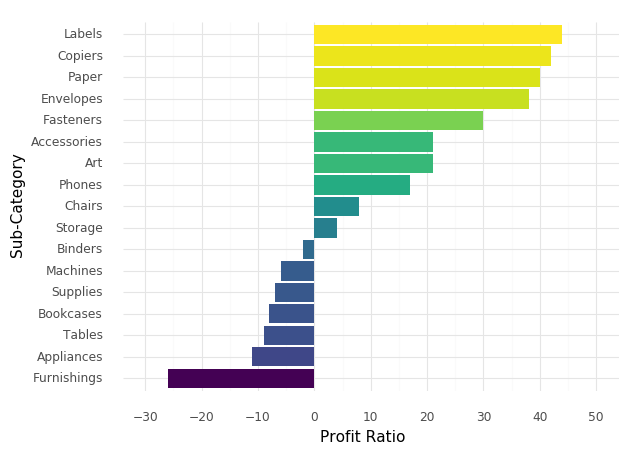

<ggplot: (-9223363304363571214)>

In [11]:
g = (ggplot(df, aes(x='new_sub',y='Profit Ratio',fill='Profit Ratio')) + #baseplot
    geom_col() + #type of plot
    coord_flip() + #flip coordinates
    theme_minimal() + #theme
    theme(legend_position = 'none') + #wher to put legend
    scale_y_continuous(breaks=range(-30,60,10), limits=(-30,50)) +#handle y ticks
    scale_x_discrete(labels=list(df['Sub-Category'].unique())) + #change x-axis labels
    labs(x='Sub-Category') #change label title
    ) 
g

## ~~Diverging~~ Stacked Bar
Perfect for presenting survey results which involve sentiment (eg disagree, neutral, agreed). The diverging aspect is more of a gimmick than to show real difference between features so we do not implement it.

In [12]:
df = pd.read_csv('data/diverging-stacked-bar.csv')
df.head()

,type,question,percentage,_1
0,Not at all,Has grace under pressure,0.021531,0
1,Not at all,Makes good coffee,0.021480,0
2,Not at all,Likes the Beatles,0.019139,0
3,Not at all,Is Kind to animals,0.028986,0
4,Not at all,Can Play Jazz,0.028777,0


In [13]:
df[df.question=='Can Play Jazz']

,type,question,percentage,_1
4,Not at all,Can Play Jazz,0.028777,0
15,Small degree,Can Play Jazz,0.059952,1
23,Moderate Degree,Can Play Jazz,0.249400,2
30,High Degree,Can Play Jazz,0.249400,3
36,Very High Degree,Can Play Jazz,0.412470,4


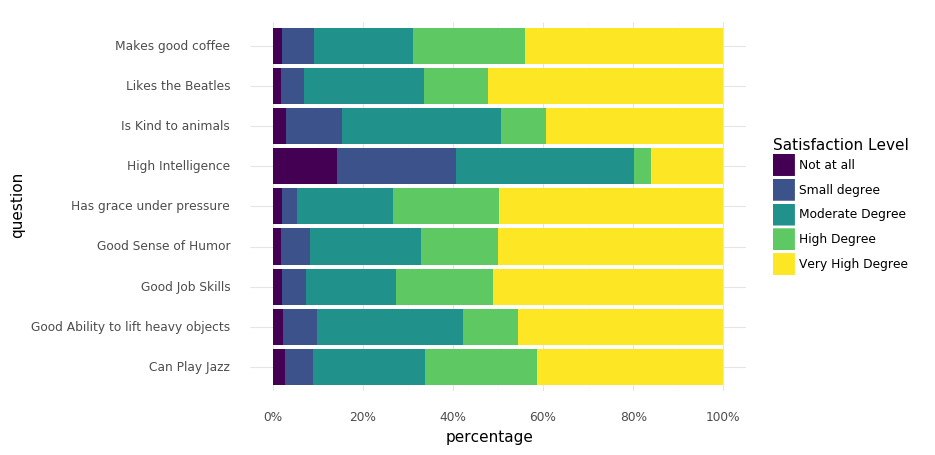

<ggplot: (8732491045289)>

In [14]:
g = (ggplot(df, aes(x='question',y='percentage', fill='_1')) + #baseplot
    geom_col() + #type of plot
    coord_flip() + #flip coordinates
    theme_minimal() + #theme
     
    #legend customizaation
    guides(fill = guide_legend()) + #use guide_legend instead of guide_colorbar
    labs(fill='Satisfaction Level') + #legend title
    scale_fill_continuous(labels=list(df.type.unique())) + #
     
    #tick customization
    scale_y_continuous(breaks=[i/100 for i in range(0,110,20)],   #breaks
                       limits=(0,1),                              #limits
                       labels=[f'{i}%' for i in range(0,110,20)]) #labels
    ) 
g

## Spine
Splits a single value into 2 contrasting components (eg Male/Female)

In [187]:
df = pd.read_csv('data/spine.csv')
#make women negative and men positive
df['Response'] = df.apply(lambda x: -x['Response'] if x['Gender']=='Women' else x['Response'], 1)
df.head()

,Gender,Nationality,Response
0,Women,UAE,-0.331337
1,Women,Saudi Arabian,-0.429000
2,Women,Malaysian,-0.460717
3,Women,Vietnamese,-0.469591
4,Women,Indonesian,-0.484211


In [188]:
df.tail()

,Gender,Nationality,Response
35,Men,German,0.486275
36,Men,British,0.484152
37,Men,Swedish,0.483712
38,Men,Hong Kong,0.480357
39,Men,French,0.477833


In [189]:
#order countries by women's responses
women_df = df[df.Gender=='Women'].copy()
women_df['rnk'] = women_df['Response'].argsort().map(lambda x: str(x).zfill(2)+'_')
women_df['Nationality_'] = women_df['rnk'] + women_df['Nationality'] 
women_df.drop(['rnk','Gender','Response'],1,inplace=True)
women_df

,Nationality,Nationality_
0,UAE,19_UAE
1,Saudi Arabian,18_Saudi Arabian
2,Malaysian,17_Malaysian
3,Vietnamese,16_Vietnamese
4,Indonesian,15_Indonesian
5,Indian,14_Indian
6,Egyptian,13_Egyptian
7,Filipino,12_Filipino
8,Norwegian,11_Norwegian
9,Finnish,10_Finnish


In [190]:
#merge new nation labels to main df
df = df.merge(women_df)
df.head()

,Gender,Nationality,Response,Nationality_
0,Women,UAE,-0.331337,19_UAE
1,Men,UAE,0.668663,19_UAE
2,Women,Saudi Arabian,-0.429000,18_Saudi Arabian
3,Men,Saudi Arabian,0.571000,18_Saudi Arabian
4,Women,Malaysian,-0.460717,17_Malaysian


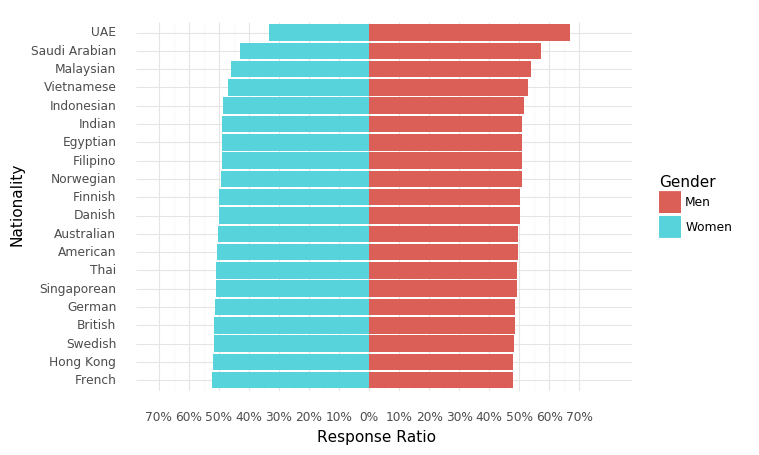

<ggplot: (8755573863779)>

In [192]:
g = (ggplot(df, aes(x='Nationality_',y='Response', fill='Gender')) + #baseplot
    geom_col() + #type of plot
    coord_flip() + #flip coordinates
    theme_minimal()  +#theme
    scale_x_discrete(labels=list(df.Nationality.unique())[::-1]) + #cusotmize x-axis labels
    scale_y_continuous(breaks=[i/100 for i in range(-70,80,10)],   #breaks
                       limits=(-0.7,0.8),                              #limits
                       labels=[f'{abs(i)}%' for i in range(-70,80,10)]) + #labels
    labs(x='Nationality', y ='Response Ratio')
    ) 
g

## Surplus/deficit filled line
The shaded area of these charts allows a balance to be shown; either against a baseline or between two series

In [194]:
df = pd.read_csv('data/surplus-deficit-filled-line.csv')
df['surplus'] = df.MonthlyAvg.map(lambda x: True if x>0 else False)
df.head()

,Date,MonthlyAvg,surplus
0,2015-01-01,-33621.456256,False
1,2015-02-01,-43338.459256,False
2,2015-03-01,7832.657744,True
3,2015-04-01,-19563.006256,False
4,2015-05-01,-24210.064256,False


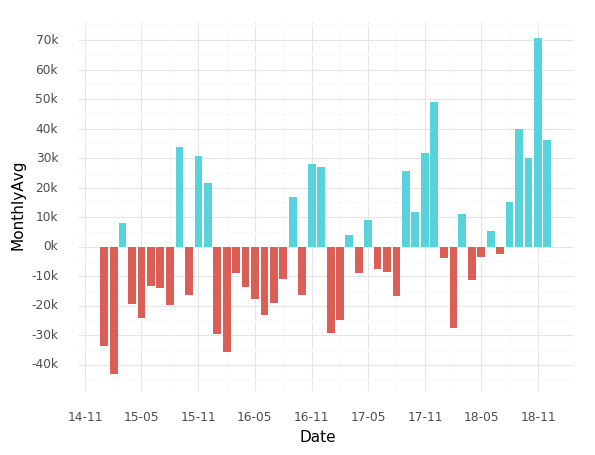

<ggplot: (-9223363281282218692)>

In [214]:
g = (ggplot(df, aes(x='Date',y='MonthlyAvg',fill='surplus')) +
    geom_col() + theme_minimal() + theme(legend_position='none') +
    scale_x_date(breaks = date_breaks('6 month'), labels = date_format("%y-%m")) + #date formating
    scale_y_continuous(breaks = range(-40000,80000,10000), 
                      labels = [f'{int(i/1000)}k' for i in range(-40000,80000,10000)]) #format y-axis
    ) 
g

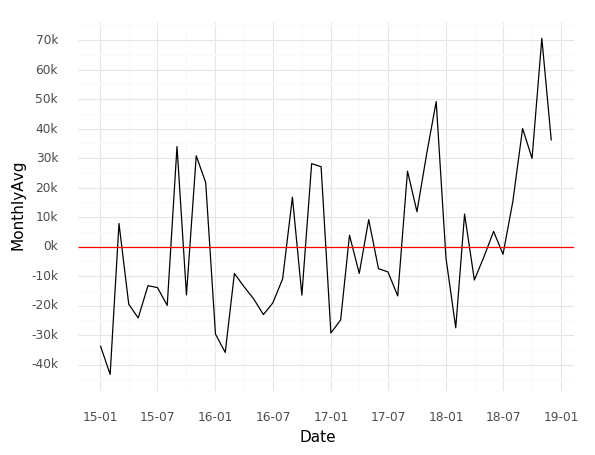

<ggplot: (-9223363281280887338)>

In [250]:
g = (ggplot(df, aes(x='Date',y='MonthlyAvg',group=1)) +
    geom_line() + #use line instead
    theme_minimal() + theme(legend_position='none') +
    geom_hline(aes(yintercept=0), color='red') + #horizontal line
    scale_x_date(breaks = date_breaks('6 month'), labels = date_format("%y-%m")) + #date formating
    scale_y_continuous(breaks = range(-40000,80000,10000), 
                      labels = [f'{int(i/1000)}k' for i in range(-40000,80000,10000)]) #format y-axis
    ) 
g